In [1]:
# importing libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Data Gathering for 2017 dataset

In [2]:
# getting the dataset
data2017 = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\Mansi\Research\CrimeAgainstWomen\dataset\NCRB_2017.csv");

In [3]:
data2017.head()

,S. No (Col.1),City (Col.2),IPC - Murder with Rape/Gang Rape - I (Col.3),IPC - Murder with Rape/Gang Rape - V (Col.4),IPC - Murder with Rape/Gang Rape - R (Col.5),IPC - Dowry Deaths (Sec. 304B IPC) - I (Col.6),IPC - Dowry Deaths (Sec. 304B IPC) - V (Col.7),IPC - Dowry Deaths (Sec. 304B IPC) - R (Col.8),IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - I (Col.9),IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - V (Col.10),...,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - F) POCSO Act r/w Section 377 IPC / Unnatural Offences - R (Col.155),"SLL - Indecent Representation of Women (Prohibition) Act, 1986 - I (Col.156)","SLL - Indecent Representation of Women (Prohibition) Act, 1986 - V (Col.157)","SLL - Indecent Representation of Women (Prohibition) Act, 1986 - R (Col.158)",SLL - Total SLL Crimes against Women - I (Col.159),SLL - Total SLL Crimes against Women - V (Col.160),SLL - Total SLL Crimes against Women - R (Col.161),Total Crime against Women (IPC+SLL) - I (Col.162),Total Crime against Women (IPC+SLL) - V (Col.163),Total Crime against Women (IPC+SLL) - R (Col.164)
0,1,Ahmedabad (Gujarat),0,0,0.0,2,2,0.1,24,24,...,0.0,0,0,0,301,301,10.0,1405,1405,46.8
1,2,Bengaluru (Karnataka),2,2,0.0,48,53,1.2,89,89,...,0.1,0,0,0,1281,1371,31.6,3565,3737,87.8
2,3,Chennai (Tamil Nadu),0,0,0.0,3,3,0.1,24,24,...,0.0,1,1,0,368,531,8.5,642,805,14.9
3,4,Coimbatore (Tamil Nadu),0,0,0.0,0,0,0.0,0,0,...,0.0,0,0,0,39,39,3.6,76,76,7.1
4,5,Delhi,6,6,0.1,102,102,1.3,38,39,...,0.0,1,1,0,1492,1498,19.7,11542,12151,152.4


# changing the names of columns

In [4]:
def removeCol(columns):
    new_col = []
    for col in columns:
        # Remove the pattern (Col.x)
        new_name = re.sub(r'\(Col\.\d+\)', '', col).strip()
        new_col.append(new_name)
    return new_col

In [5]:
data2017.columns = removeCol(data2017.columns)

In [6]:
# checking missing values
missing_values = data2017.isnull().sum()
print(missing_values)
# data has no missing values

S. No                                       0
City                                        0
IPC - Murder with Rape/Gang Rape - I        0
IPC - Murder with Rape/Gang Rape - V        0
IPC - Murder with Rape/Gang Rape - R        0
                                           ..
SLL - Total SLL Crimes against Women - V    0
SLL - Total SLL Crimes against Women - R    0
Total Crime against Women (IPC+SLL) - I     0
Total Crime against Women (IPC+SLL) - V     0
Total Crime against Women (IPC+SLL) - R     0
Length: 164, dtype: int64


In [7]:
# considering only Registered data we will remove the other details

# Filter columns ending with 'R'
registered_columns = [col for col in data2017.columns if col.endswith('R')]

# "City" columns
columns_to_keep = ['City'] + registered_columns

# Filter the DataFrame to include only the selected columns
df2017 = data2017[columns_to_keep]

In [8]:
df2017.head()

,City,IPC - Murder with Rape/Gang Rape - R,IPC - Dowry Deaths (Sec. 304B IPC) - R,IPC - Abetment to Suicide of Women (Sec. 305/306 IPC) - R,IPC - Miscarriage (Sec. 313 & 314 IPC) - R,IPC - Acid Attack (Sec. 326A IPC) - R,IPC - Attempt to Acid Attack (Sec. 326B IPC) - R,IPC - Cruelty by Husband or his relatives (Sec. 498 A IPC) - R,IPC - Kidnapping & Abduction of Women - Total - R,IPC - Kidnapping & Abduction of Women - Sec. 336 IPC - R,...,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - Total - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - A) Child Rape (Sec. 4 & 6 of POCSO Act) / Sec. 376 IPC) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - B) Sexual Assault of Children (Sec. 8 & 10 of POCSO Act) / Sec. 354 IPC) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - C) Sexual Harassment (Sec. 12 of POCSO Act) / Sec. 509 IPC) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - D) Use of Child for Pornography/Storing Child Pornography Material (Sec. 14 & 15 of POCSO Act) - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - E) POCSO Act (Sections 17 to 22) / Other offences of POCSO Act - R,SLL - Protection of Children from Sexual Violence Act (Girl Child Victims only) - F) POCSO Act r/w Section 377 IPC / Unnatural Offences - R,"SLL - Indecent Representation of Women (Prohibition) Act, 1986 - R",SLL - Total SLL Crimes against Women - R,Total Crime against Women (IPC+SLL) - R
0,Ahmedabad (Gujarat),0.0,0.1,0.8,0.0,0.0,0.0,22.2,3.9,1.2,...,9.7,7.4,1.7,0.5,0.0,0.1,0.0,0,10.0,46.8
1,Bengaluru (Karnataka),0.0,1.2,2.2,0.1,0.0,0.0,12.1,10.6,10.1,...,9.9,6.8,2.0,0.8,0.0,0.1,0.1,0,31.6,87.8
2,Chennai (Tamil Nadu),0.0,0.1,0.6,0.0,0.0,0.0,2.9,0.4,0.2,...,3.3,1.9,1.1,0.1,0.0,0.0,0.0,0,8.5,14.9
3,Coimbatore (Tamil Nadu),0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.2,0.0,...,1.3,0.7,0.6,0.0,0.0,0.0,0.0,0,3.6,7.1
4,Delhi,0.1,1.3,0.5,0.0,0.1,0.1,32.3,41.8,38.6,...,19.2,11.4,7.4,0.4,0.0,0.0,0.0,0,19.7,152.4


# Visualization

In [9]:
cities = df2017['City']
typeCrime = df2017.columns[1:53]

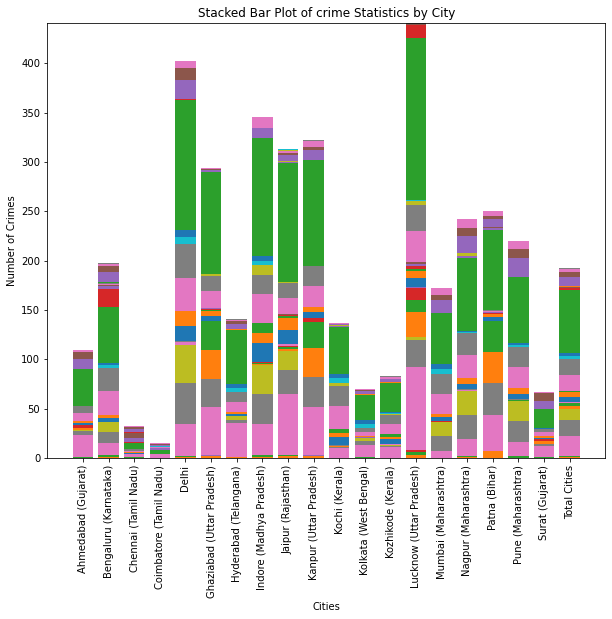

In [10]:
# Compare the distribution of different types of crimes within each city

# Creating stacked bar plot
plt.figure(figsize=(10,8))
bottom = None

for category in typeCrime:
    if bottom is None:
        plt.bar(cities,df2017[category],label=category)
        bottom = df2017[category]
    else:
        plt.bar(cities,df2017[category],bottom=bottom,label=category)
        bottom+= df2017[category]
        
# Adding labels and legend
plt.xlabel('Cities')
plt.ylabel('Number of Crimes')
plt.title('Stacked Bar Plot of crime Statistics by City')

# Displaying the plot
plt.xticks(rotation=90)

plt.show()            

In [31]:
# comparing the highest crime city (Lucknow) vs Lowest crime city (Coimbatore) and finding the categories that are severe in lucknow
# extracting data for each city
lucknow_data = df2017[df2017['City'] == 'Lucknow (Uttar Pradesh)'].iloc[0, 1:]
coimbatore_data = df2017[df2017['City'] == 'Coimbatore (Tamil Nadu)'].iloc[0, 1:]
categories = df2017.columns[1:]  # Assuming the first column is 'City'

In [33]:
# Define the threshold
threshold = 5 
# Filter categories based on the threshold
significant_categories = (lucknow_data > threshold) | (coimbatore_data > threshold)
filtered_categories = df2017.columns[1:][significant_categories]
filtered_lucknow_data = lucknow_data[significant_categories]
filtered_coimbatore_data = coimbatore_data[significant_categories]

In [34]:
# Define the position of the bars on the x-axis
bar_width = 0.35
r1 = np.arange(len(filtered_categories))
r2 = [x + bar_width for x in r1]

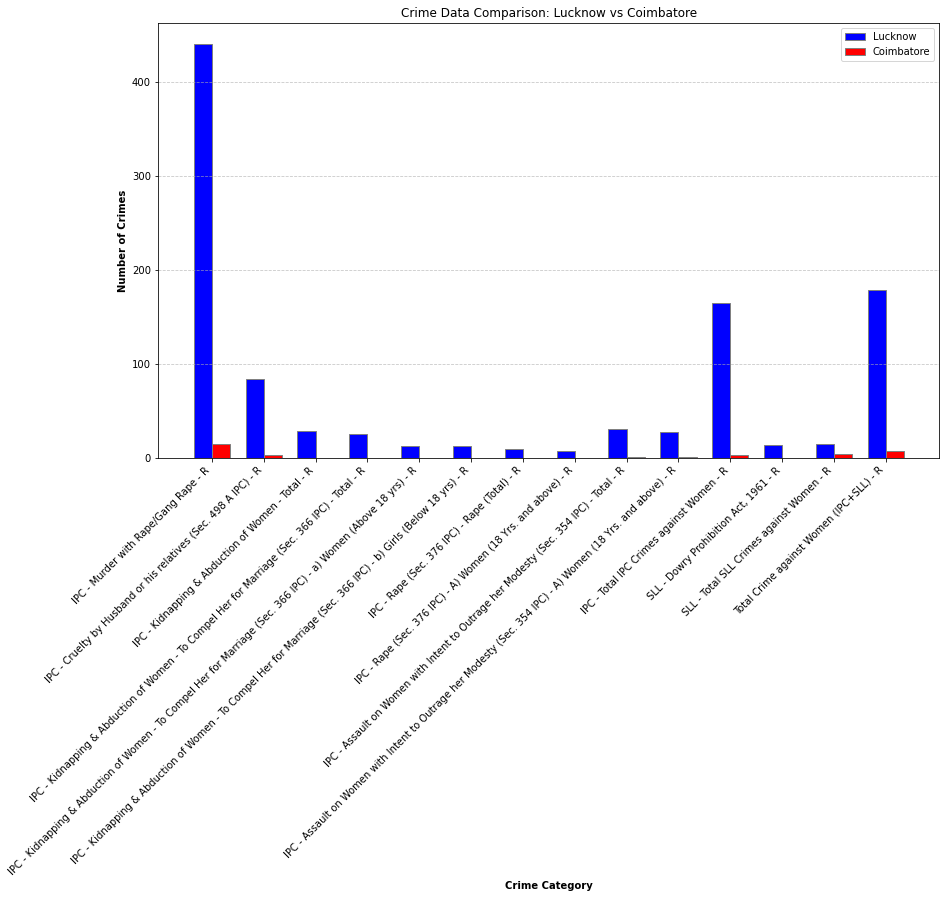

In [35]:
# Create the bar chart
plt.figure(figsize=(14, 8))
plt.bar(r1, filtered_lucknow_data, color='b', width=bar_width, edgecolor='grey', label='Lucknow')
plt.bar(r2, filtered_coimbatore_data, color='r', width=bar_width, edgecolor='grey', label='Coimbatore')
# Add labels
plt.xlabel('Crime Category', fontweight='bold')
plt.ylabel('Number of Crimes', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(filtered_categories))], filtered_categories, rotation=45, ha='right')
# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add title and legend
plt.title('Crime Data Comparison: Lucknow vs Coimbatore')
plt.legend()
# Show the plot
#plt.tight_layout()
plt.show()

In [46]:
# Study the Rape Cases across the all cities
# Extract data for Rape Cases
rape_cases = df2017[['City', 'IPC - Murder with Rape/Gang Rape - R']]
# Filter out cities with zero rape cases for a cleaner pie chart
rape_cases = rape_cases[rape_cases['IPC - Murder with Rape/Gang Rape - R'] > 0]
# Removing the Total cities
rape_cases = rape_cases[rape_cases['City']!='Total Cities']
print(rape_cases)

                         City  IPC - Murder with Rape/Gang Rape - R
0         Ahmedabad (Gujarat)                                 110.0
1       Bengaluru (Karnataka)                                 198.0
2        Chennai (Tamil Nadu)                                  32.3
3     Coimbatore (Tamil Nadu)                                  15.0
4                       Delhi                                 402.7
5   Ghaziabad (Uttar Pradesh)                                 293.9
6       Hyderabad (Telangana)                                 140.6
7     Indore (Madhya Pradesh)                                 345.6
8          Jaipur (Rajasthan)                                 313.4
9      Kanpur (Uttar Pradesh)                                 322.2
10             Kochi (Kerala)                                 137.2
11      Kolkata (West Bengal)                                  70.4
12         Kozhikode (Kerala)                                  83.0
13    Lucknow (Uttar Pradesh)                   

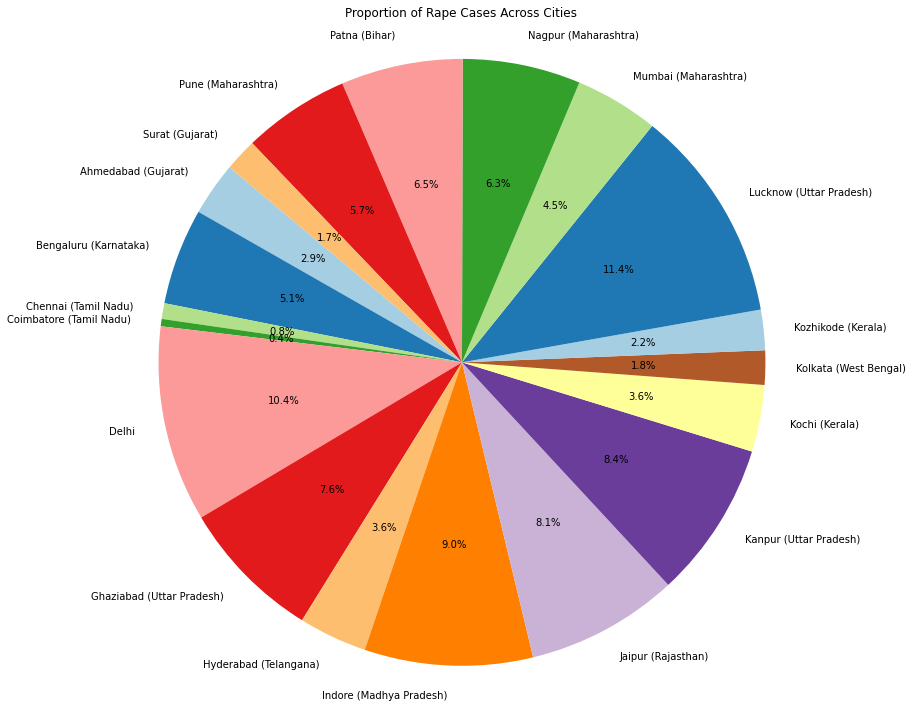

In [47]:
# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(rape_cases['IPC - Murder with Rape/Gang Rape - R'], 
        labels=rape_cases['City'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# Add title
plt.title('Proportion of Rape Cases Across Cities',pad=20)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Show the plot
plt.show()

# Conclusion